In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, accuracy_score,recall_score,auc,confusion_matrix,classification_report
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.impute import SimpleImputer
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
datalist=pd.read_csv("classification_data.csv")

In [3]:
datalist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [4]:
datalist.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [5]:
datalist.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Length: 100000, dtype: int64

In [5]:
datalist.shape

(100000, 46)

In [6]:
dataset=datalist.drop_duplicates()

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
count_session,9207.0,1.990800e+01,2.105902e+01,1.000000e+00,7.000000e+00,1.400000e+01,2.600000e+01,2.700000e+02
count_hit,9207.0,2.489794e+03,3.399778e+03,2.000000e+00,5.250000e+02,1.347000e+03,3.149000e+03,4.874400e+04
totals_newVisits,9207.0,1.238188e-02,1.105889e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
geoNetwork_latitude,9207.0,2.488703e+01,3.414327e+00,-3.392490e+01,2.445390e+01,2.520480e+01,2.520480e+01,5.932930e+01
geoNetwork_longitude,9207.0,5.427132e+01,8.852935e+00,-8.762980e+01,5.437730e+01,5.527080e+01,5.527080e+01,1.403187e+02
historic_session,9207.0,8.449205e+03,1.094549e+04,2.000000e+00,2.049000e+03,4.923000e+03,1.053800e+04,1.817150e+05
historic_session_page,9207.0,1.807768e+03,4.143497e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.008500e+03,9.989600e+04
youtube,9207.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
avg_session_time,9207.0,4.692371e+02,4.342812e+02,2.000000e+00,2.210540e+02,3.600000e+02,5.762938e+02,5.441000e+03
avg_session_time_page,9207.0,1.642882e+02,4.208421e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.358157e+02,5.441000e+03


In [8]:
le = LabelEncoder()

In [9]:
obj_columns = datalist.select_dtypes(include="object").columns
obj_columns

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [10]:
for i in obj_columns:
    dataset[i] = list(map(str,dataset[i]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2894429698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = list(map(str,dataset[i]))


In [11]:
obj_columns

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [12]:
dataset["channelGrouping"]=le.fit_transform(dataset["channelGrouping"])
dataset['device_browser']=le.fit_transform(dataset['device_browser'])
dataset["device_operatingSystem"]=le.fit_transform(dataset["device_operatingSystem"])
dataset["device_deviceCategory"]=le.fit_transform(dataset["device_deviceCategory"])
dataset["geoNetwork_region"]=le.fit_transform(dataset["geoNetwork_region"])
dataset["earliest_source"]=le.fit_transform(dataset["earliest_source"])
dataset["latest_source"]=le.fit_transform(dataset["latest_source"])
dataset["earliest_medium"]=le.fit_transform(dataset["earliest_medium"])
dataset["latest_medium"]=le.fit_transform(dataset["latest_medium"])
dataset["earliest_keyword"]=le.fit_transform(dataset["earliest_keyword"])
dataset["latest_keyword"]=le.fit_transform(dataset["latest_keyword"])
dataset["products_array"]=le.fit_transform(dataset["products_array"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2200813971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["channelGrouping"]=le.fit_transform(dataset["channelGrouping"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2200813971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['device_browser']=le.fit_transform(dataset['device_browser'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2200813971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [13]:
dataset.select_dtypes(include="bool").columns

Index(['device_isMobile', 'earliest_isTrueDirect', 'latest_isTrueDirect'], dtype='object')

In [14]:
dataset["device_isMobile"]=le.fit_transform(dataset["device_isMobile"])
dataset["earliest_isTrueDirect"]=le.fit_transform(dataset["earliest_isTrueDirect"])
dataset["latest_isTrueDirect"]=le.fit_transform(dataset["latest_isTrueDirect"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2414945182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["device_isMobile"]=le.fit_transform(dataset["device_isMobile"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2414945182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["earliest_isTrueDirect"]=le.fit_transform(dataset["earliest_isTrueDirect"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2414945182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [15]:
dataset

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,0,0,5,1,1,1,71,25.3463,...,2,1,1,1900,0,5617,0,2265,0,2021-01-01
2,28,1816,2,0,5,1,1,1,2,25.4052,...,1,1,1,3843,0,77417,1477195214,898,1,2021-01-01
3,2,299,2,0,5,1,1,1,1,24.4539,...,96,1,1,592,0,1576,0,2234,0,2021-01-01
16,3,507,2,0,5,6,1,1,1,24.4539,...,95,1,1,507,0,1958,28745286,414,1,2021-01-01
20,9,1037,2,0,5,1,1,1,25,25.2048,...,2,1,1,1674,0,138440,1054124685,2506,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,5,6,1,1,1,24.4539,...,68,1,1,471,0,278,0,1,0,2021-01-01
99907,28,3071,2,0,5,1,1,1,1,24.4539,...,95,1,1,4071,0,3810,183879066,2265,0,2021-01-01
99908,7,1018,2,0,5,6,1,1,25,25.2048,...,95,1,1,7258,0,0,363923999,1353,1,2021-01-01
99921,6,818,2,0,5,1,1,1,25,25.2048,...,31,1,1,818,0,2958,0,2299,0,2021-01-01


In [16]:
dataset['target_date'] = pd.to_datetime(dataset['target_date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\3210003987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['target_date'] = pd.to_datetime(dataset['target_date'])


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   count_session           9207 non-null   int64         
 1   count_hit               9207 non-null   int64         
 2   channelGrouping         9207 non-null   int32         
 3   totals_newVisits        9207 non-null   int64         
 4   device_browser          9207 non-null   int32         
 5   device_operatingSystem  9207 non-null   int32         
 6   device_isMobile         9207 non-null   int64         
 7   device_deviceCategory   9207 non-null   int32         
 8   geoNetwork_region       9207 non-null   int32         
 9   geoNetwork_latitude     9207 non-null   float64       
 10  geoNetwork_longitude    9207 non-null   float64       
 11  historic_session        9207 non-null   int64         
 12  historic_session_page   9207 non-null   int64       

In [18]:
def plot_data(column_name):
    data1 = datalist[column_name].value_counts()
    color = sns.color_palette("husl",len(data1))
    plt.figure(figsize=(4,6))
    data1.plot(kind="bar",color= color)
    plt.show()

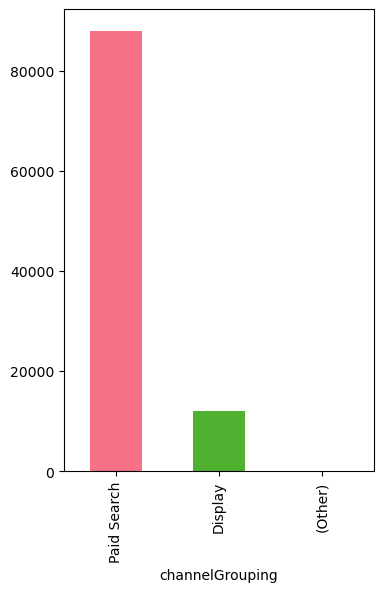

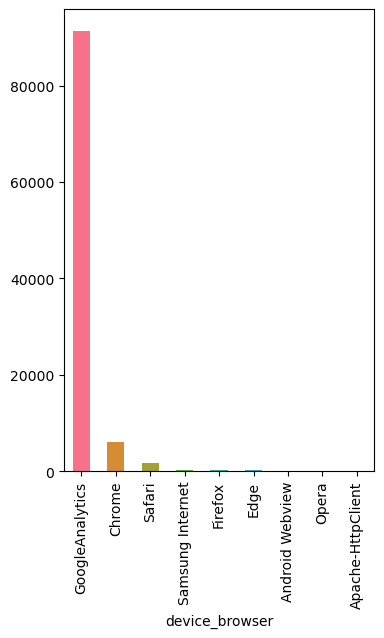

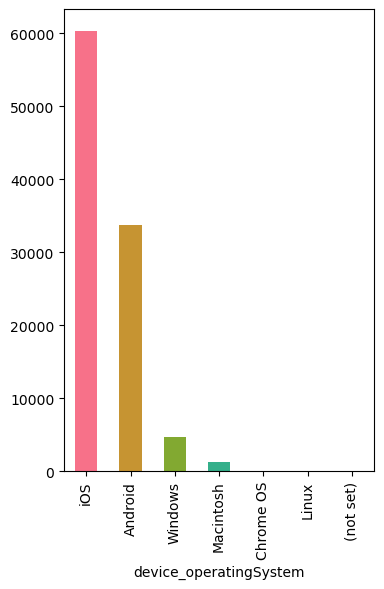

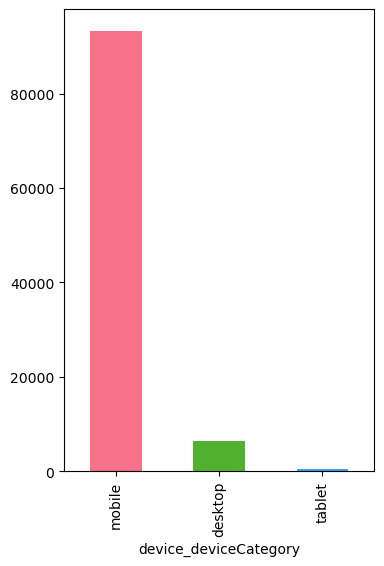

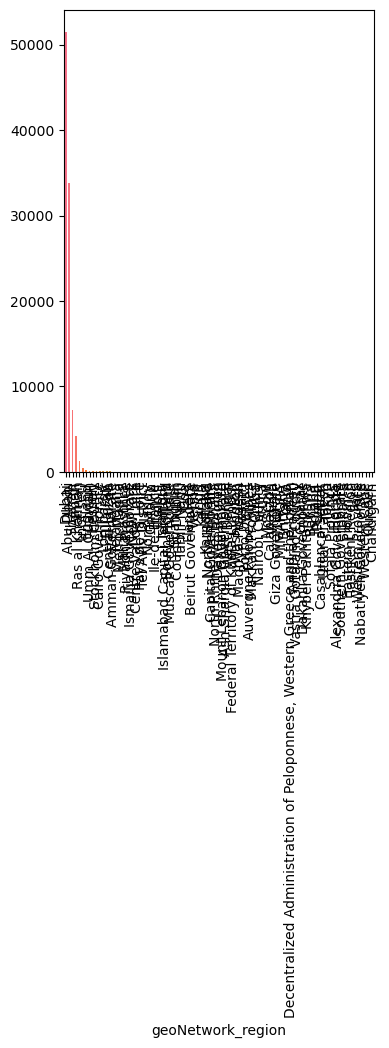

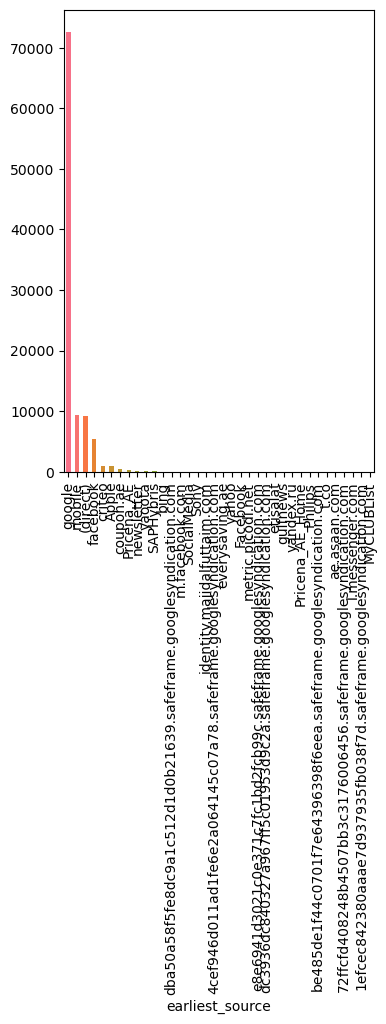

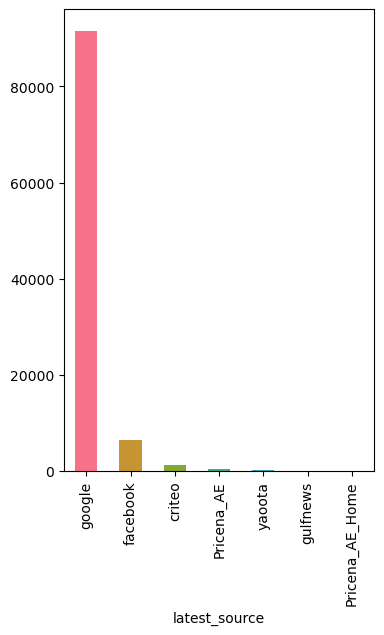

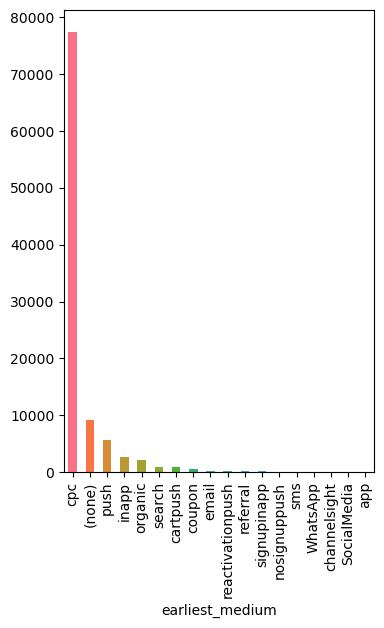

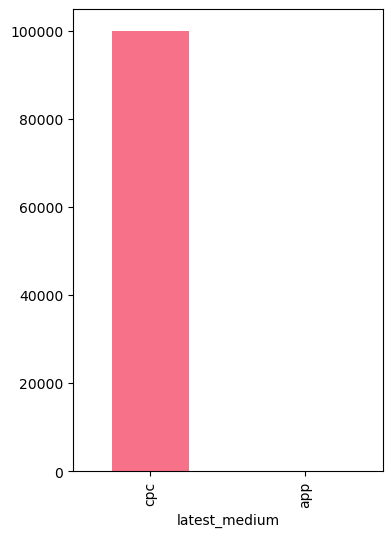

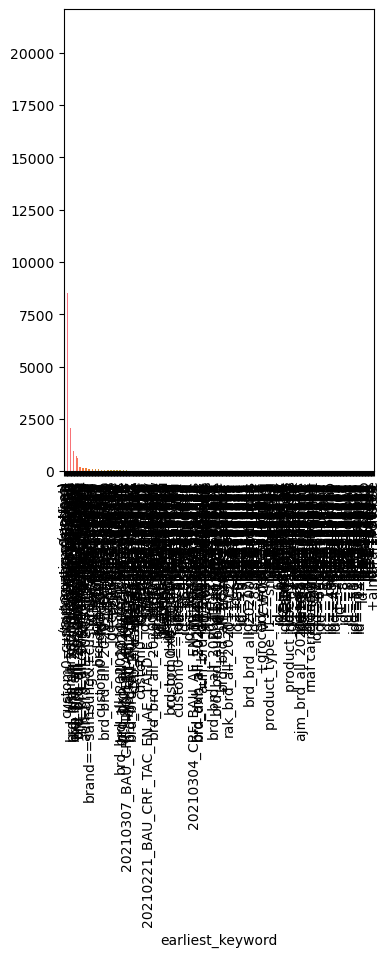

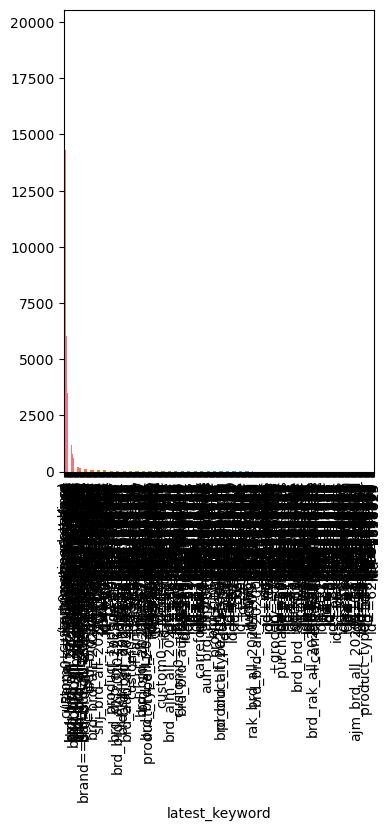

ValueError: Image size of 382x72796 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 400x600 with 1 Axes>

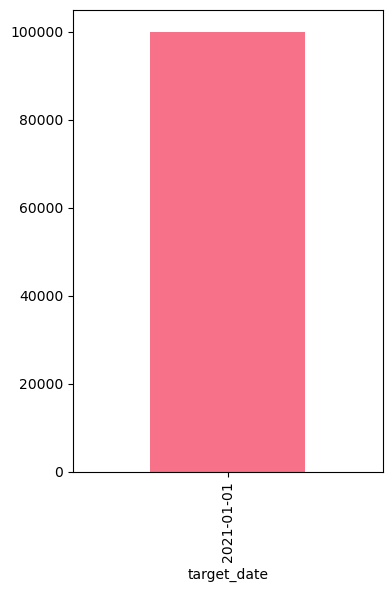

In [19]:
for i in obj_columns:
    plot_data(i)

In [198]:
## from that we can easily understand what columns we need
#target_date has same values for converted and not converted .so we drop that features
# products_array is too large.

In [20]:
numeric_columns = dataset.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

In [21]:
correlation_matrix

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted
count_session,1.000000,0.856096,-0.002417,-0.088877,0.111947,0.045597,0.137204,0.132393,-0.056737,-0.000628,...,-0.036634,-0.010616,0.140833,0.118986,0.760016,0.044868,0.153830,0.091560,0.070176,0.100391
count_hit,0.856096,1.000000,0.013933,-0.075445,0.115239,0.234980,0.146535,0.142723,-0.087080,0.002825,...,0.023835,0.005351,0.158377,0.129847,0.871843,0.051623,0.093644,0.088279,-0.029933,0.228865
channelGrouping,-0.002417,0.013933,1.000000,0.034250,-0.069322,0.146864,-0.093071,-0.093838,-0.025498,0.037036,...,0.237873,0.348827,-0.040494,-0.035887,0.025076,0.011748,0.002482,0.006980,-0.120481,0.092067
totals_newVisits,-0.088877,-0.075445,0.034250,1.000000,-0.149279,0.070804,-0.236885,-0.226040,-0.009770,0.003611,...,0.005032,-0.013870,-0.205269,-0.267001,-0.071458,-0.003422,-0.010688,-0.013183,-0.086941,-0.036781
device_browser,0.111947,0.115239,-0.069322,-0.149279,1.000000,-0.069150,0.749035,0.723994,0.006916,-0.003827,...,0.002891,-0.003489,0.173313,0.114105,0.109237,-0.009436,-0.003234,0.020726,0.146988,0.090626
device_operatingSystem,0.045597,0.234980,0.146864,0.070804,-0.069150,1.000000,-0.151744,-0.146340,-0.056514,-0.008570,...,0.174327,0.061938,0.044024,-0.002832,0.259398,0.021180,-0.167705,-0.022248,-0.529317,0.531552
device_isMobile,0.137204,0.146535,-0.093071,-0.236885,0.749035,-0.151744,1.000000,0.967346,0.003020,0.005859,...,0.007175,-0.011286,0.210219,0.154807,0.133416,-0.013013,-0.022918,0.014129,0.173554,0.099949
device_deviceCategory,0.132393,0.142723,-0.093838,-0.226040,0.723994,-0.146340,0.967346,1.000000,0.004267,0.006415,...,-0.000400,-0.014888,0.204934,0.148545,0.128811,-0.013027,-0.020917,0.012016,0.168784,0.093268
geoNetwork_region,-0.056737,-0.087080,-0.025498,-0.009770,0.006916,-0.056514,0.003020,0.004267,1.000000,0.076802,...,0.018878,0.030239,-0.017886,-0.001175,-0.086958,-0.000543,-0.016474,-0.031397,0.003927,-0.059370
geoNetwork_latitude,-0.000628,0.002825,0.037036,0.003611,-0.003827,-0.008570,0.005859,0.006415,0.076802,1.000000,...,0.024006,0.016394,-0.017459,0.002088,-0.006931,0.021652,-0.007762,-0.006867,0.000673,-0.005509


<Axes: >

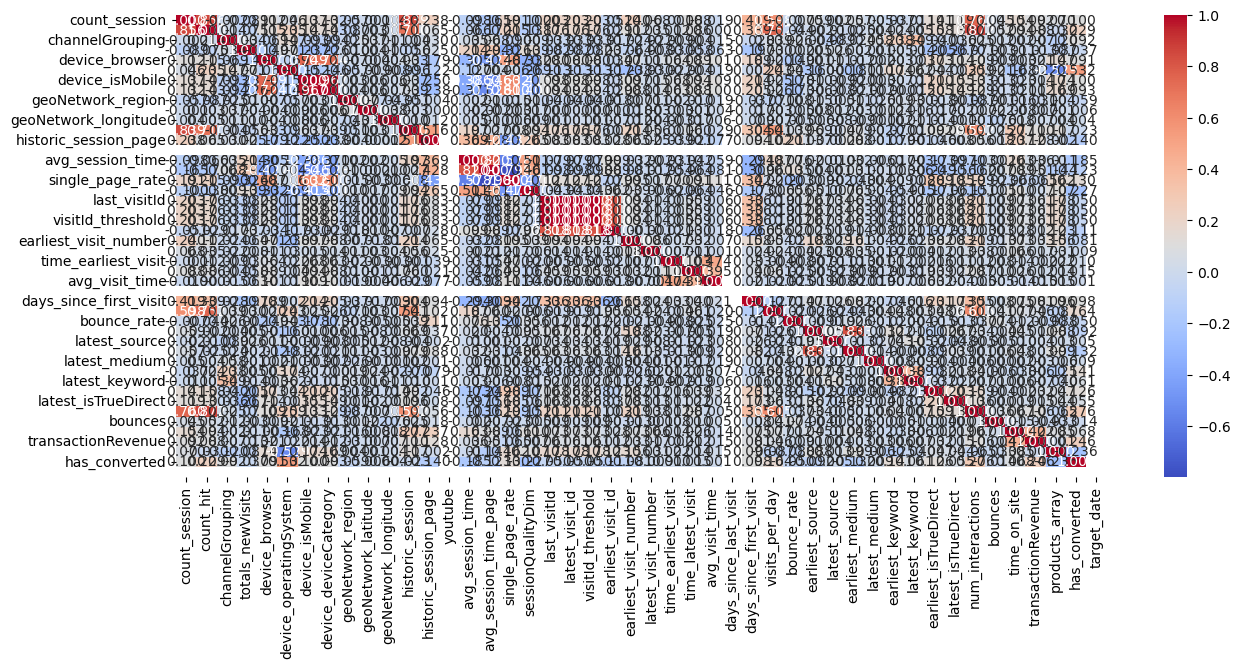

In [22]:
corr_data = dataset.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".3f")

In [23]:
highcorr=set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr=correlation_matrix.iloc[i,j]
        cr_name=correlation_matrix.columns[i]
        if abs(corr)>0.9:
            highcorr.add(cr_name)   

In [24]:
highcorr

{'device_deviceCategory', 'latest_visit_id', 'visitId_threshold'}

In [25]:
data3=dataset.drop(['device_deviceCategory', 'latest_visit_id', 'visitId_threshold'],axis=1)

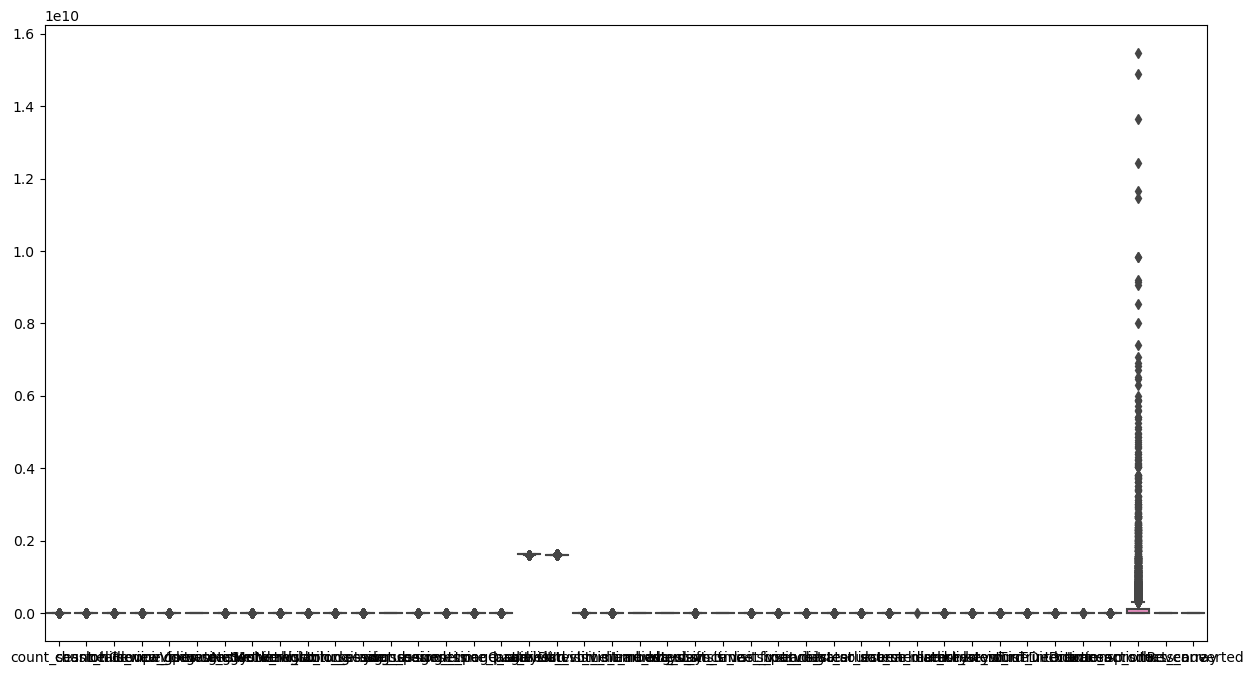

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data3)
plt.show()

In [27]:
data4=data3.drop("products_array",axis=1)

In [28]:
data5=data4.copy()
data5["transactionRevenue"]=1/data4["transactionRevenue"]
data5.replace([np.inf, -np.inf], np.nan, inplace=True)
data5.interpolate(inplace=True)
data5['transactionRevenue'] = data5['transactionRevenue'].fillna(data5['transactionRevenue'].mean())
data5

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,geoNetwork_region,geoNetwork_latitude,geoNetwork_longitude,...,earliest_keyword,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,has_converted,target_date
0,9,1194,0,0,5,1,1,71,25.3463,55.4209,...,3,2,1,1,1900,0,5617,1.505052e-08,0,2021-01-01
2,28,1816,2,0,5,1,1,2,25.4052,55.5136,...,3,1,1,1,3843,0,77417,6.769586e-10,1,2021-01-01
3,2,299,2,0,5,1,1,1,24.4539,54.3773,...,89,96,1,1,592,0,1576,1.773264e-08,0,2021-01-01
16,3,507,2,0,5,6,1,1,24.4539,54.3773,...,88,95,1,1,507,0,1958,3.478831e-08,1,2021-01-01
20,9,1037,2,0,5,1,1,25,25.2048,55.2708,...,3,2,1,1,1674,0,138440,9.486544e-10,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99888,1,195,2,0,5,6,1,1,24.4539,54.3773,...,61,68,1,1,471,0,278,1.158380e-08,0,2021-01-01
99907,28,3071,2,0,5,1,1,1,24.4539,54.3773,...,90,95,1,1,4071,0,3810,5.438357e-09,0,2021-01-01
99908,7,1018,2,0,5,6,1,25,25.2048,55.2708,...,88,95,1,1,7258,0,0,2.747826e-09,1,2021-01-01
99921,6,818,2,0,5,1,1,25,25.2048,55.2708,...,3,31,1,1,818,0,2958,4.726206e-09,0,2021-01-01


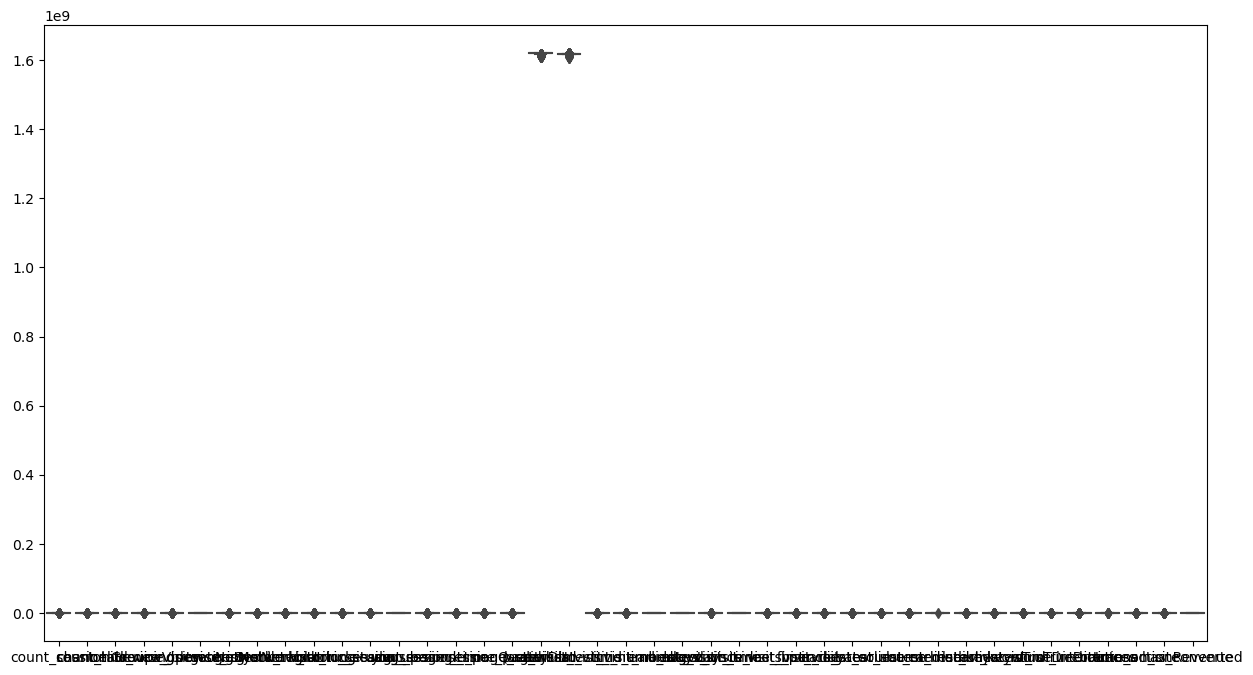

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data5)
plt.show()

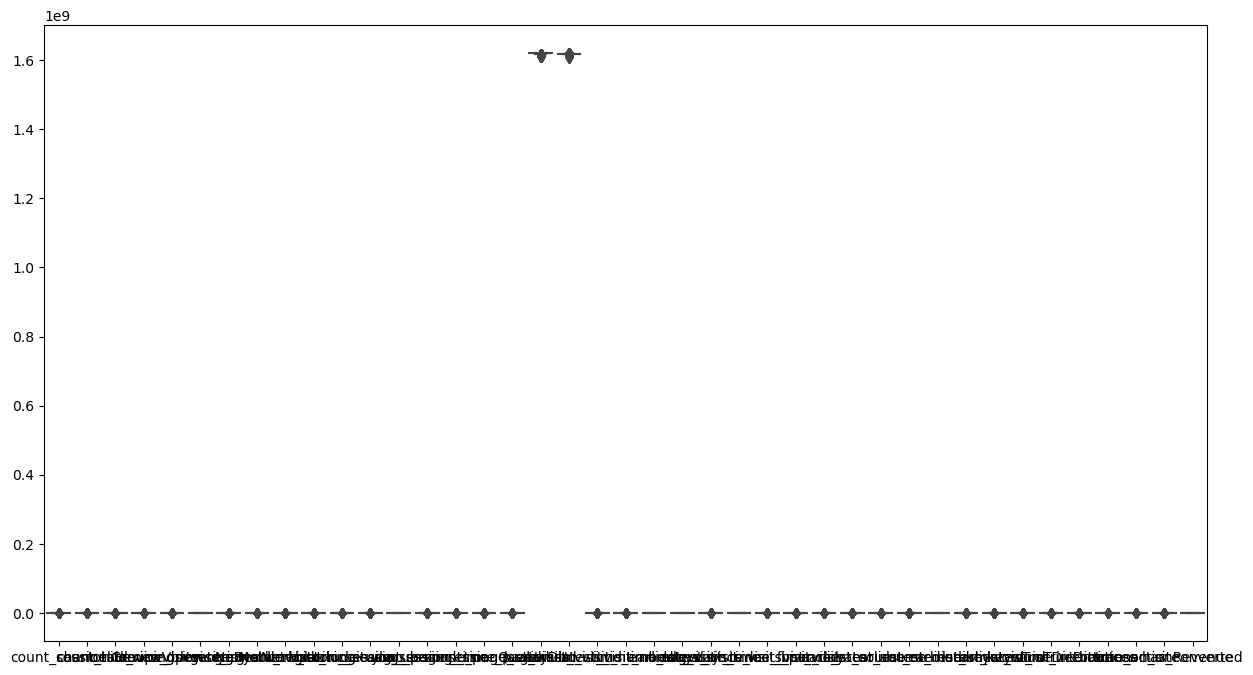

In [30]:
data_6=data5.copy()
data_6["latest_keyword"]=1/data5["latest_keyword"]
data_6["latest_medium"]=1/data5["latest_medium"]
data_6['latest_keyword'] = data_6['latest_keyword'].fillna(data_6['latest_keyword'].mean())
data_6['latest_medium'] = data_6['latest_medium'].fillna(data_6['latest_medium'].mean())
plt.figure(figsize=(15,8))
sns.boxplot(data=data_6)
plt.show()

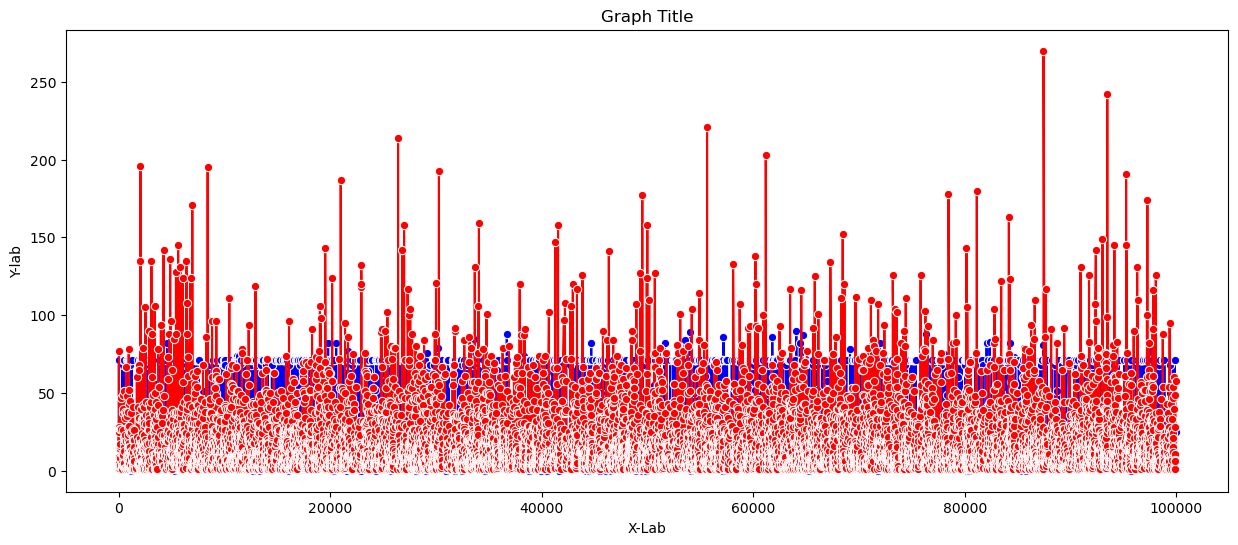

In [31]:
fig, a = plt.subplots(figsize=(15,6))

sns.lineplot(data=data_6, x=data_6.index,y="geoNetwork_region",marker='o',color='blue')
sns.lineplot(data=data_6, x=data_6.index,y="count_session",marker='o',color="red")
plt.title("Graph Title")
plt.xlabel("X-Lab")
plt.ylabel("Y-lab")
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
data_6=data_6.drop("transactionRevenue",axis=1)

In [34]:
X_train_scaled=data_6.drop("target_date",axis =1)
y=data_6["target_date"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)

In [36]:
X_train_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_scaled.fillna(1e10, inplace=True)  # Replace NaN with a large finite number

# Convert to float32 to avoid precision issues
X_train_scaled = X_train_scaled.astype('float32')

# Check for NaN and Infinity values
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).any())
print("Infinity values in X_train_scaled:", np.isinf(X_train_scaled).any())

NaN values in X_train_scaled: count_session             False
count_hit                 False
channelGrouping           False
totals_newVisits          False
device_browser            False
device_operatingSystem    False
device_isMobile           False
geoNetwork_region         False
geoNetwork_latitude       False
geoNetwork_longitude      False
historic_session          False
historic_session_page     False
youtube                   False
avg_session_time          False
avg_session_time_page     False
single_page_rate          False
sessionQualityDim         False
last_visitId              False
earliest_visit_id         False
earliest_visit_number     False
latest_visit_number       False
time_earliest_visit       False
time_latest_visit         False
avg_visit_time            False
days_since_last_visit     False
days_since_first_visit    False
visits_per_day            False
bounce_rate               False
earliest_source           False
latest_source             False
earliest_m

In [37]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_scaled: (9207, 40)
Shape of y_train: (7365,)


In [38]:
missing_rows = set(X_train_scaled.index) - set(y_train.index)


In [39]:
X_train_scaled = X_train_scaled.drop(index=missing_rows)
y_train = y_train.loc[X_train_scaled.index]

# Now check the shapes again
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_scaled: (7365, 40)
Shape of y_train: (7365,)


In [40]:
rf_model = RandomForestClassifier(n_estimators=20,random_state=42)

In [41]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [42]:
rf_model.feature_importances_ * 100

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [43]:
pd.DataFrame({
    "columns":X_train_scaled.columns,
    "imp_scor":rf_model.feature_importances_ *100
}).sort_values("imp_scor",ascending=False).head(20)['columns'].to_list()

['count_session',
 'count_hit',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_source',
 'latest_source',
 'earliest_medium',
 'latest_medium',
 'earliest_keyword',
 'latest_keyword',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'time_earliest_visit']

In [44]:
data_7=X_train_scaled[['device_operatingSystem',
 'time_on_site',
 'sessionQualityDim',
 'num_interactions',
 'visits_per_day',
 'avg_session_time',
 'avg_session_time_page',
 'historic_session_page',
 'earliest_visit_id',
 'count_hit',
 'historic_session',
 'last_visitId',
 'latest_visit_number',
 'earliest_visit_number',
 'time_latest_visit',
 'time_earliest_visit',
 'count_session',
 'single_page_rate',
 'latest_keyword',
 'earliest_keyword']]

In [45]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7365 entries, 2 to 99908
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   device_operatingSystem  7365 non-null   float32
 1   time_on_site            7365 non-null   float32
 2   sessionQualityDim       7365 non-null   float32
 3   num_interactions        7365 non-null   float32
 4   visits_per_day          7365 non-null   float32
 5   avg_session_time        7365 non-null   float32
 6   avg_session_time_page   7365 non-null   float32
 7   historic_session_page   7365 non-null   float32
 8   earliest_visit_id       7365 non-null   float32
 9   count_hit               7365 non-null   float32
 10  historic_session        7365 non-null   float32
 11  last_visitId            7365 non-null   float32
 12  latest_visit_number     7365 non-null   float32
 13  earliest_visit_number   7365 non-null   float32
 14  time_latest_visit       7365 non-null   floa

In [46]:

# Add a new column
new_column_name = "has_converted"
new_column_values = dataset['has_converted']  # Provide the values for the new column
data_7[new_column_name] = new_column_values


C:\Users\Admin\AppData\Local\Temp\ipykernel_10384\2799510393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7[new_column_name] = new_column_values


### Random Forest 

In [47]:
x = data_7.drop('has_converted',axis=1)
y = data_7['has_converted']

In [48]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=40)

In [49]:
model_rf = RandomForestClassifier(n_estimators=150)

In [50]:
model_rf.fit(train_data,train_lab)

RandomForestClassifier(n_estimators=150)

In [51]:
train_pred = model_rf.predict(train_data)
test_pred = model_rf.predict(test_data)

### Train Performance Metrics

In [52]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1 = f1_score(train_lab,train_pred,average="micro")

print(acc,
pre,
rec,
f1 )

1.0 1.0 1.0 1.0


### Test Performance Metrics

In [53]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1 = f1_score(test_lab,test_pred,average="micro")

print(acc,
pre,
rec,
f1 )

0.8384249830278343 0.8384249830278343 0.8384249830278343 0.8384249830278344


In [54]:
confusion_matrix(test_lab,test_pred)

array([[757,  99],
       [139, 478]], dtype=int64)

### Classification Report

In [55]:
print(classification_report(test_lab,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       856
           1       0.83      0.77      0.80       617

    accuracy                           0.84      1473
   macro avg       0.84      0.83      0.83      1473
weighted avg       0.84      0.84      0.84      1473



### Save Model

In [56]:
with open("model_rf.pkl","wb") as mf:
    pickle.dump(model_rf,mf)

In [57]:
with open("model_rf.pkl","rb") as mf:
    new_model = pickle.load(mf)

In [58]:
 new_model

RandomForestClassifier(n_estimators=150)

In [59]:
# give 20 values for test data because we save the model based of feature importance score
test_data = np.array([[100, 92, 9000000, 612,36.0788,370,-81.1781,6574,987,674,93735,36373,33838,675,98,6,65,8,665,87 ]])

In [60]:
predicted = new_model.predict(test_data)[0]
if predicted:
    print(predicted)
else: 
    print("Sorry Something Wrong")

1


C:\Users\Admin\anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
new_model.predict_proba(test_data)

C:\Users\Admin\anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.43333333, 0.56666667]])

### Desicion Tree Model

In [62]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=45)

In [63]:
train_data

,device_operatingSystem,time_on_site,sessionQualityDim,num_interactions,visits_per_day,avg_session_time,avg_session_time_page,historic_session_page,earliest_visit_id,count_hit,historic_session,last_visitId,latest_visit_number,earliest_visit_number,time_latest_visit,time_earliest_visit,count_session,single_page_rate,latest_keyword,earliest_keyword
16852,1.0,258.0,5.0,2482.0,32.884617,465.181824,47.909092,527.0,1.616607e+09,855.0,5117.0,1.618707e+09,16.0,6.0,0.930000,17.570000,11.0,0.909091,1.052632e-02,27.0
30704,1.0,3162.0,53.0,6691.0,132.185181,606.161316,266.806458,8271.0,1.617607e+09,3569.0,18791.0,1.619890e+09,102.0,72.0,17.430000,7.180000,31.0,0.870968,1.098901e-02,83.0
96103,1.0,167264.0,20.0,830.0,30.000000,781.200012,0.000000,0.0,1.615362e+09,810.0,3906.0,1.617644e+09,43.0,39.0,17.400000,7.650000,5.0,1.000000,1.972387e-03,88.0
61907,1.0,1754.0,4.0,1396.0,28.285715,437.555542,0.000000,0.0,1.616765e+09,792.0,3938.0,1.619093e+09,238.0,230.0,12.080000,13.250000,9.0,1.000000,1.052632e-02,83.0
67261,1.0,13785.0,8.0,1575.0,7.769231,200.000000,0.000000,0.0,1.617553e+09,202.0,400.0,1.619719e+09,92.0,91.0,18.020000,16.350000,2.0,1.000000,1.000000e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49133,6.0,0.0,2.0,3106.0,147.000000,59.000000,0.000000,0.0,1.619715e+09,147.0,59.0,1.619715e+09,52.0,52.0,16.950001,16.950001,1.0,1.000000,1.000000e+00,1.0
81461,1.0,5637.0,10.0,1302.0,30.653847,361.214294,63.142857,884.0,1.617523e+09,797.0,5057.0,1.619714e+09,17.0,4.0,16.530001,7.820000,14.0,0.928571,1.098901e-02,3.0
78366,1.0,4679.0,6.0,3320.0,50.692307,533.619019,147.571426,3099.0,1.617730e+09,1318.0,11206.0,1.619880e+09,131.0,111.0,14.550000,17.350000,21.0,0.714286,1.901141e-03,3.0
89005,6.0,292.0,2.0,23414.0,148.964279,210.550003,0.000000,0.0,1.617266e+09,4171.0,4211.0,1.619626e+09,244.0,76.0,16.120001,8.570000,20.0,1.000000,1.041667e-02,89.0


In [64]:
model1 = DecisionTreeClassifier(
    
    criterion='entropy',   #### Performance
    splitter='best',
    max_depth=10,  #### Performance
    min_samples_split=2,  #### Performance
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,  #### Performance
    random_state=45,  #### Performance
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

In [65]:
model1

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [66]:
model1.fit(train_data,train_lab)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [67]:
unique_classes = set(train_pred)  # Assuming train_pred contains your model predictions
class_names = ['0', '1']  # Adjust based on your actual class names
if len(unique_classes) != len(class_names):
    print("Number of classes does not match. Check class_names.")

In [68]:
train_pred = model1.predict(train_data)
test_pred = model1.predict(test_data)

### Train Performance Metrics

In [69]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1_ = f1_score(train_lab,train_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(train_lab,train_pred)

acc: 0.9041072640868975 
Precision: 0.9041072640868975 
recall:  0.9041072640868975 
F1-score:  0.9041072640868976


array([[3195,  271],
       [ 294, 2132]], dtype=int64)

### Test Performance Metrics

In [70]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1_ = f1_score(test_lab,test_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(test_lab,test_pred)

acc: 0.8126272912423625 
Precision: 0.8126272912423625 
recall:  0.8126272912423625 
F1-score:  0.8126272912423625


array([[723, 144],
       [132, 474]], dtype=int64)

### Classification Report

In [71]:
print(classification_report(test_lab,test_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       867
           1       0.77      0.78      0.77       606

    accuracy                           0.81      1473
   macro avg       0.81      0.81      0.81      1473
weighted avg       0.81      0.81      0.81      1473



### Gradient Boost ALgorithm

In [72]:
train_data, test_data, train_lab, test_lab = train_test_split(x,y, test_size=0.2, random_state=42)

In [73]:
model_gb = GradientBoostingClassifier(learning_rate=0.12,n_estimators=150)

In [74]:
model_gb.fit(train_data,train_lab)

GradientBoostingClassifier(learning_rate=0.12, n_estimators=150)

In [75]:
train_pred = model_gb.predict(train_data)
test_pred = model_gb.predict(test_data)

### Train Performance Metrics

In [76]:
acc = accuracy_score(train_lab,train_pred)
pre = precision_score(train_lab,train_pred,average="micro")
rec = recall_score(train_lab,train_pred,average="micro")
f1_ = f1_score(train_lab,train_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(train_lab,train_pred)

acc: 0.878479293957909 
Precision: 0.878479293957909 
recall:  0.878479293957909 
F1-score:  0.878479293957909


array([[3116,  338],
       [ 378, 2060]], dtype=int64)

### Test Performance metrics

In [77]:
acc = accuracy_score(test_lab,test_pred)
pre = precision_score(test_lab,test_pred,average="micro")
rec = recall_score(test_lab,test_pred,average="micro")
f1_ = f1_score(test_lab,test_pred,average="micro")

print("acc:",acc,"\nPrecision:",pre,"\nrecall: ",rec,"\nF1-score: ",f1_)
confusion_matrix(test_lab,test_pred)

acc: 0.8316361167684997 
Precision: 0.8316361167684997 
recall:  0.8316361167684997 
F1-score:  0.8316361167684996


array([[763, 116],
       [132, 462]], dtype=int64)

### Classifiaction Report

In [78]:
print(classification_report(train_lab,train_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3454
           1       0.86      0.84      0.85      2438

    accuracy                           0.88      5892
   macro avg       0.88      0.87      0.87      5892
weighted avg       0.88      0.88      0.88      5892



In [79]:
print(classification_report(test_lab,test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       879
           1       0.80      0.78      0.79       594

    accuracy                           0.83      1473
   macro avg       0.83      0.82      0.82      1473
weighted avg       0.83      0.83      0.83      1473



In [80]:
test_lab.value_counts()

has_converted
0    879
1    594
Name: count, dtype: int64